<a href="https://colab.research.google.com/github/Data-Citadel/DeepLearning-Assignment1/blob/main/DL_Assignment_PS5_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vision Dataset-MNIST Fashion Dataset



## 1. Import Libraries/Dataset

In [39]:

# Import tensorflow and keras library
import tensorflow as tf

from tensorflow import keras

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# Time library
import time

# Seaborn style
sns.set(style="whitegrid", palette="muted")

## 1.1 Load Dataset

In [41]:
# Load MNIST Fashion dataset from keras library
fashion_data = keras.datasets.fashion_mnist

# Destructuring the data into train and test
(X_train_full, y_train_full), (X_test, y_test) = fashion_data.load_data()

## 1.2 GPU Availability

In [42]:
# Checking for GPU availability
print("Is GPU enabled in this machine? \n{}".format(tf.config.list_physical_devices('GPU')))

Is GPU enabled in this machine? 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 2. Data Visualization

### 2.1 Shape of Train and Test data

In [43]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [44]:
print("Shape of Training Data : {}".format(X_train_full.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Training Data : (60000, 28, 28)
Shape of Test Data : (10000, 28, 28)


In [45]:
# Number of classes
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### 2.2 Plot image data

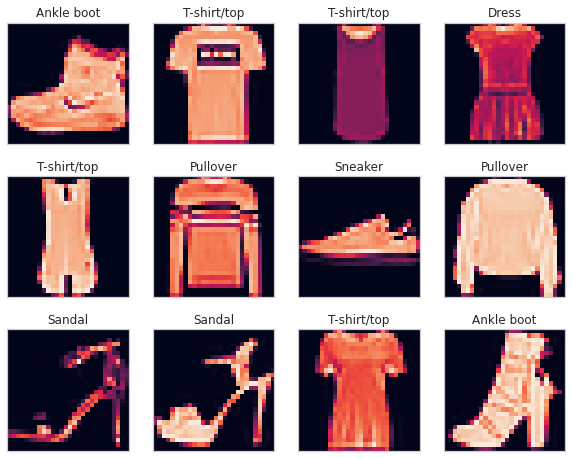

In [46]:
plt.figure(figsize=(10,8))

for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(X_train_full[i])
  index = y_train_full[i]
  plt.title(class_names[index])
  plt.xticks([])
  plt.yticks([])

plt.show()

## 3. Data Pre-Processing

### 3.1 Process the image data



In [47]:
# X_train_full = X_train_full.reshape((60000, 28 * 28))
# X_train_full = X_train_full.astype('float32') / 255

# X_test = X_test.reshape((10000, 28 * 28))
# X_test = X_test.astype('float32') / 255

# Convert target labels to one-hot encoding matrix
y_train_full = keras.utils.to_categorical(y_train_full)
y_test = keras.utils.to_categorical(y_test)


### 3.2 Split the data into Train, Holdout and Dev(test)

In [48]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [49]:
print("Shape of Training set {}".format(X_train.shape))
print("Shape of Holdout set {}".format(X_valid.shape))

Shape of Training set (48000, 28, 28)
Shape of Holdout set (12000, 28, 28)


## 4. Model Building

A function to construct a network with 3-Dense layers with appropriate input layer will be defined. 

In [105]:
def build_model():
  # L2 regularizer rate
  l2_rate = 0.003 # 0.001 
  dropout_rate = 0.3 # Dropout rate

  model = keras.models.Sequential()

  model.add(keras.layers.Input(shape=(28, 28, 1)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(256, activation='relu',
                               kernel_regularizer=keras.regularizers.L2(l2_rate)))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(128, activation='relu',
                            kernel_regularizer=keras.regularizers.L2(l2_rate)))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(64, activation='relu',
                            kernel_regularizer=keras.regularizers.L2(l2_rate)))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(10, activation='softmax'))

  return model


In [106]:
# Building a model
ffnn_model = build_model()

In [107]:
ffnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)               

## 5. Compile the model

The model is compiled with the following parameters
1. Loss Function - Categorical Cross Entropy
2. Optimizer - ADAM with learning rate 0.0005
3. Metrics - Accuracy

In [108]:
ffnn_model.compile(loss=keras.losses.CategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(learning_rate=0.00023),
                  metrics=['accuracy'])

## 6. Train Model

The model will be trained by fitting the training and validation data. 

In [109]:
epochs_run = 30
batchsize = 128

# start time
start_time = time.perf_counter()

# Fitting the data
history = ffnn_model.fit(X_train, 
                         y_train, 
                         epochs=epochs_run, 
                         batch_size=batchsize,
                         validation_data=(X_valid, y_valid), 
                         verbose=1)
# Total time taken for training the given dataset
elapsed = time.perf_counter() - start_time


Epoch 1/30
375/375 [==============================] - 1s 3ms/step - loss: 14.5815 - accuracy: 0.3137 - val_loss: 3.3470 - val_accuracy: 0.4897
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 3.8724 - accuracy: 0.4134 - val_loss: 3.1067 - val_accuracy: 0.5730
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 3.4003 - accuracy: 0.4944 - val_loss: 2.9109 - val_accuracy: 0.5998
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 3.1392 - accuracy: 0.5538 - val_loss: 2.7699 - val_accuracy: 0.6587
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 2.9668 - accuracy: 0.5875 - val_loss: 2.6292 - val_accuracy: 0.6746
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 2.8011 - accuracy: 0.6095 - val_loss: 2.5153 - val_accuracy: 0.6763
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 2.6643 - accuracy: 0.6205 - val_loss: 2.4006 - val_accuracy: 0.6795
Epoch

In [110]:
val_loss, val_acc = ffnn_model.evaluate(X_valid, y_valid)

print("\n\nValidation Loss {:.3f} and Validation Accuracy {:.2f}%".format(val_loss, val_acc))

375/375 [==============================] - 1s 2ms/step - loss: 0.5490 - accuracy: 0.8547


Validation Loss 0.549 and Validation Accuracy 0.85%


### 6.2 Plot loss and accuracy history graphs.

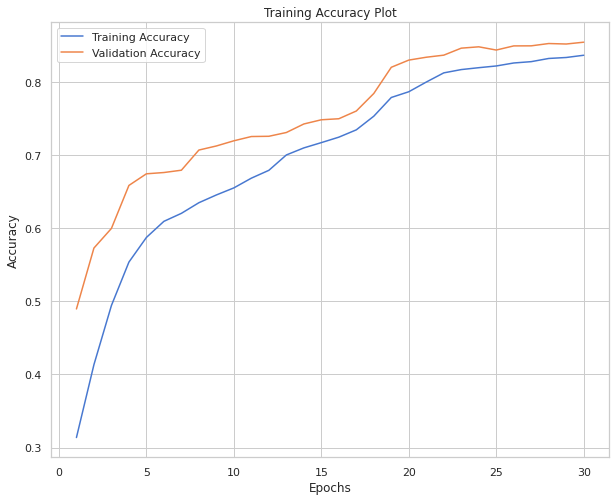

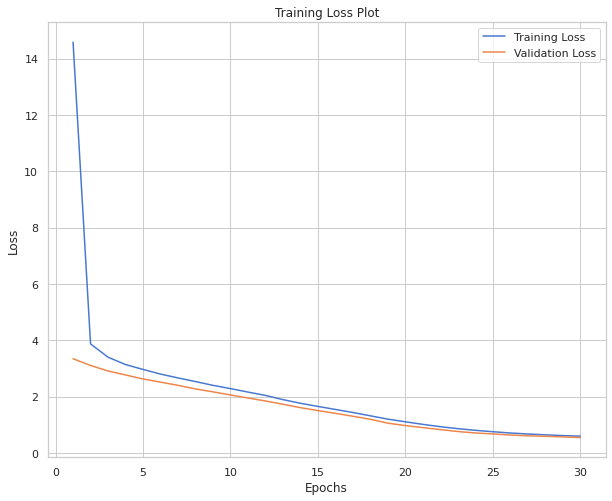

In [111]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Loss details
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10,8))
plt.plot(epochs, acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.title("Training Accuracy Plot")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss and Validation loss plot
plt.figure(figsize=(10,8))
plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title("Training Loss Plot")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Total time taken for training

In [112]:
print("=="*40)
print("Total time taken for training {:.2f} seconds".format(elapsed))
print("=="*40)

Total time taken for training 34.73 seconds


## 7. Model Evaluation

### a. Score with Test data


In [113]:
y_preds = ffnn_model.predict(X_test)

In [114]:
# Converting Logits to Class code using argmax()
y_hat = tf.argmax(y_preds, 1)
rounded_test_labels = tf.argmax(y_test, 1)

In [115]:
y_hat.numpy()

array([9, 2, 1, ..., 8, 1, 5])

In [116]:
print("Confusion Matrix: \n {}".format(classification_report(rounded_test_labels, y_hat.numpy())))

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.79      0.84      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.77      0.70      0.73      1000
           3       0.88      0.87      0.87      1000
           4       0.67      0.82      0.74      1000
           5       0.98      0.94      0.96      1000
           6       0.63      0.53      0.58      1000
           7       0.94      0.94      0.94      1000
           8       0.96      0.96      0.96      1000
           9       0.92      0.97      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

